# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [258]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame



# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [159]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [139]:
#  1. Get the total rides for each city type
urban_ride_count = pyber_data_df.groupby(["city"]).count()["ride_id"].reset_index()

urban_ride_count.head()

,city,ride_id
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [140]:
# 2. Get the total drivers for each city type
urban_driver_count = pd.DataFrame(pyber_data_df.groupby(["city"]).sum()["driver_count"]).reset_index()

urban_driver_count.head()

,city,driver_count
0,Amandaburgh,216
1,Barajasview,572
2,Barronchester,176
3,Bethanyland,396
4,Bradshawfurt,70


In [142]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df["fare"].sum()

total_fares

63538.64

In [143]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = pyber_data_df.groupby(["city"]).mean()[["fare", "driver_count"]].reset_index()

urban_avg_fare.head()

,city,fare,driver_count
0,Amandaburgh,24.641667,12.0
1,Barajasview,25.332273,26.0
2,Barronchester,36.422500,11.0
3,Bethanyland,32.956111,22.0
4,Bradshawfurt,40.064000,7.0


In [144]:
# 5. Get the average fare per driver for each city type. 
new_df = pd.merge(urban_avg_fare, urban_driver_count, how= "inner", on=["city", "city"])

new_df.head()

,city,fare,driver_count_x,driver_count_y
0,Amandaburgh,24.641667,12.0,216
1,Barajasview,25.332273,26.0,572
2,Barronchester,36.422500,11.0,176
3,Bethanyland,32.956111,22.0,396
4,Bradshawfurt,40.064000,7.0,70


In [145]:
#  6. Create a PyBer summary DataFrame. 
new_df.describe()

,fare,driver_count_x,driver_count_y
count,120.000000,120.000000,120.000000
mean,27.891371,24.775000,572.575000
std,4.944524,20.277678,563.201498
min,20.093158,1.000000,4.000000
25%,24.087619,7.000000,117.500000
50%,26.745842,20.500000,374.000000
75%,30.951579,38.250000,940.250000
max,43.278333,73.000000,2277.000000


In [146]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_data_df.index.name = type

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
<class 'type'>,,,,,,
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [147]:
#  8. Format the columns.
city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [148]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [176]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_by_type = pyber_data_df.groupby(["date", "type"]).sum()["fare"].reset_index()

sum_fares_by_type.head()

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75


In [150]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"]).reset_index

pyber_data_df()

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...,...
2370,2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [178]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_data_df.pivot = pyber_data_df.pivot(index="date", columns="type", values="fare")
   
pyber_data_df.pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [232]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Pyber_Jan_April = pyber_data_df.pivot.loc['2019-01-01' : '2019:04:29']
   
Pyber_Jan_April

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [231]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

Pyber_Jan_April = pyber_data_df.pivot.loc['2019-01-01' : '2019:04:29']. reset_index()
   
Pyber_Jan_April

type,date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,NaN,NaN,37.91
1,2019-01-01 00:46:46,NaN,47.74,NaN
2,2019-01-01 02:07:24,NaN,24.07,NaN
3,2019-01-01 03:46:50,NaN,NaN,7.57
4,2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...,...
2370,2019-05-08 04:20:00,NaN,NaN,21.99
2371,2019-05-08 04:39:49,NaN,NaN,18.45
2372,2019-05-08 07:29:01,NaN,NaN,18.55
2373,2019-05-08 11:38:35,NaN,NaN,19.77


In [242]:
# 7. Check that the datatype for the index is datetime using df.info()
Pyber_Jan_April.index = pd.to_datetime(Pyber_Jan_April.index)

Pyber_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [279]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_df = Pyber_Jan_April.resample('W').sum()

new_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


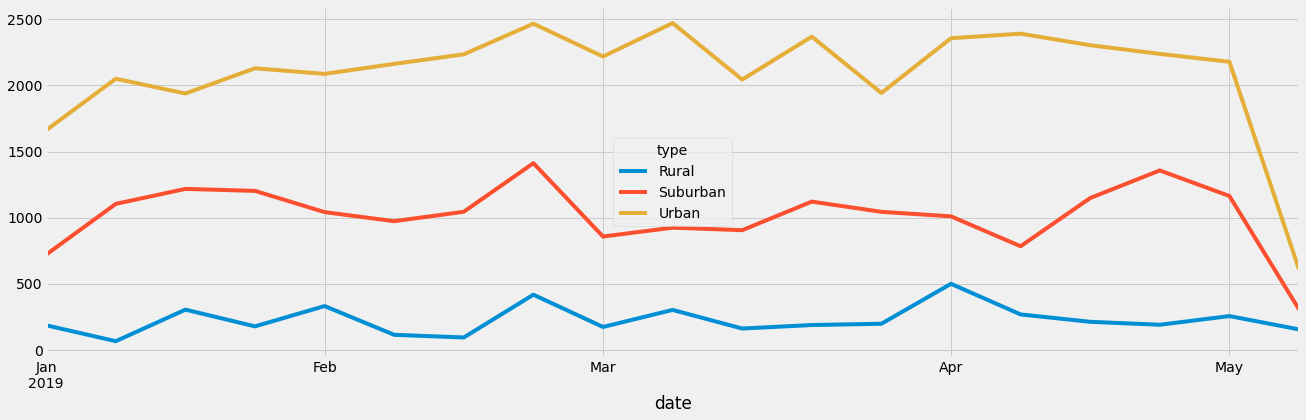

In [280]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
new_df = new_df.plot(figsize = (20,6))

In [269]:
# Create the output file (CSV).
output_data_file = "city_data.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")